In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
export_df=pd.read_csv("2018-2010_export.csv")
import_df=pd.read_csv("2018-2010_import.csv")

In [3]:
export_df.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [4]:
import_df.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [5]:
export_df.describe()

,HSCode,value,year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


In [6]:
import_df.describe()

,HSCode,value,year
count,93095.000000,79068.000000,93095.000000
mean,53.849573,63.289855,2014.654740
std,27.567486,666.652363,2.702373
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.380000,2015.000000
75%,78.000000,4.910000,2017.000000
max,99.000000,32781.570000,2018.000000


In [7]:
import_df.shape


(93095, 5)

In [8]:
export_df.shape

(137023, 5)

In [9]:
import_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [10]:
export_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [11]:
export_df['value'].describe() 

count    122985.000000
mean         21.567829
std         229.701279
min           0.000000
25%           0.030000
50%           0.360000
75%           3.770000
max       19805.170000
Name: value, dtype: float64

In [12]:
import_df['value'].describe()

count    79068.000000
mean        63.289855
std        666.652363
min          0.000000
25%          0.030000
50%          0.380000
75%          4.910000
max      32781.570000
Name: value, dtype: float64

In [13]:
print("total null values in export data:",export_df['value'].isnull().sum())
print("total null values in export data:",import_df['value'].isnull().sum())

total null values in export data: 14038
total null values in export data: 14027


In [14]:
def filling_null(data_df):
    #data_df = data_df[data_df.value!=0]
    data_df["value"].fillna(data_df['value'].mean(),inplace = True)
    import_df.year = pd.Categorical(import_df.year)
    return data_df

In [15]:
import_df = filling_null(import_df)
export_df = filling_null(export_df)


In [16]:
print("total null values in export data:",export_df['value'].isnull().sum())
print("total null values in export data:",import_df['value'].isnull().sum())

total null values in export data: 0
total null values in export data: 0


In [17]:
print("total number of countries india exporting commodity:",len(export_df['country'].unique()))
print("total number of countries india importing commodity:",len(import_df['country'].unique()))

total number of countries india exporting commodity: 248
total number of countries india importing commodity: 242


## Import And Export Country Wise

In [18]:
import_df1= import_df.groupby('country').agg({'value':'sum'}).sort_values(by='value', ascending = False)
export_df1= export_df.groupby('country').agg({'value':'sum'}).sort_values(by='value', ascending = False)

In [19]:
import_df1=import_df1.head(10)
export_df1=export_df1.head(10)

### Top Country's  India's Import

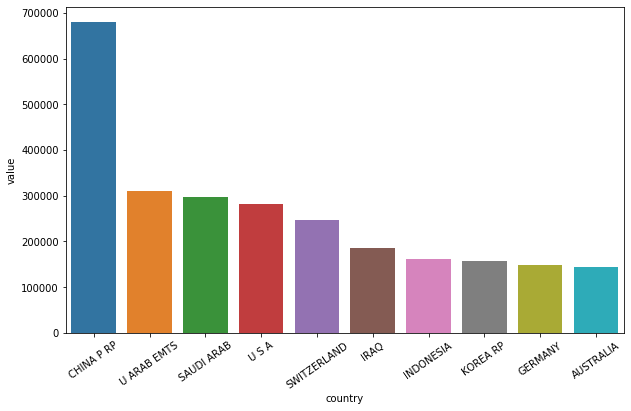

In [22]:
#import_df1.plot(kind='bar',cmap="Dark2")
plt.figure(figsize=(10,6))
sns.barplot(import_df1.index,import_df1.value)
plt.xticks(rotation=35)
plt.savefig("pic1.png")

1. China - very Huge Trade Deficit
2. UAE - little Trade Deficit
3. SAUDI three Postion

### Top Country's  India's Export

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

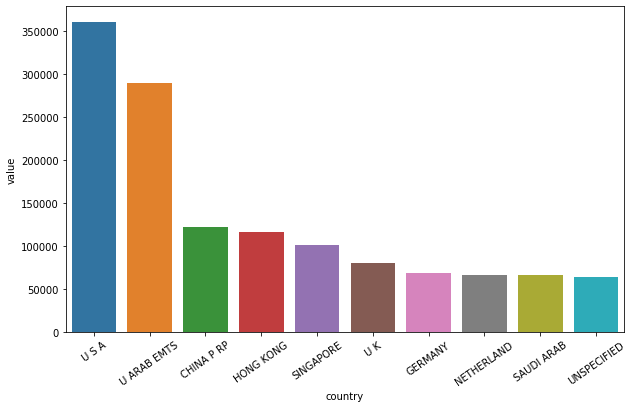

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(export_df1.index,export_df1.value)
plt.xticks(rotation=35)

USA - little Trade Surplus

#### China has biggest market in india followed by UAE,Saudi Arabia and USA
#### USA is our biggest importer followed by UAE and China Republic.

In [24]:
import_Commodity= import_df.groupby('Commodity').agg({'value':'sum'}).sort_values(by='value', ascending = False)
export_Commodity= export_df.groupby('Commodity').agg({'value':'sum'}).sort_values(by='value', ascending = False)
import_Commodity=import_Commodity.head(10);
export_Commodity=export_Commodity.head(10);



### Top 10 importing Commodities

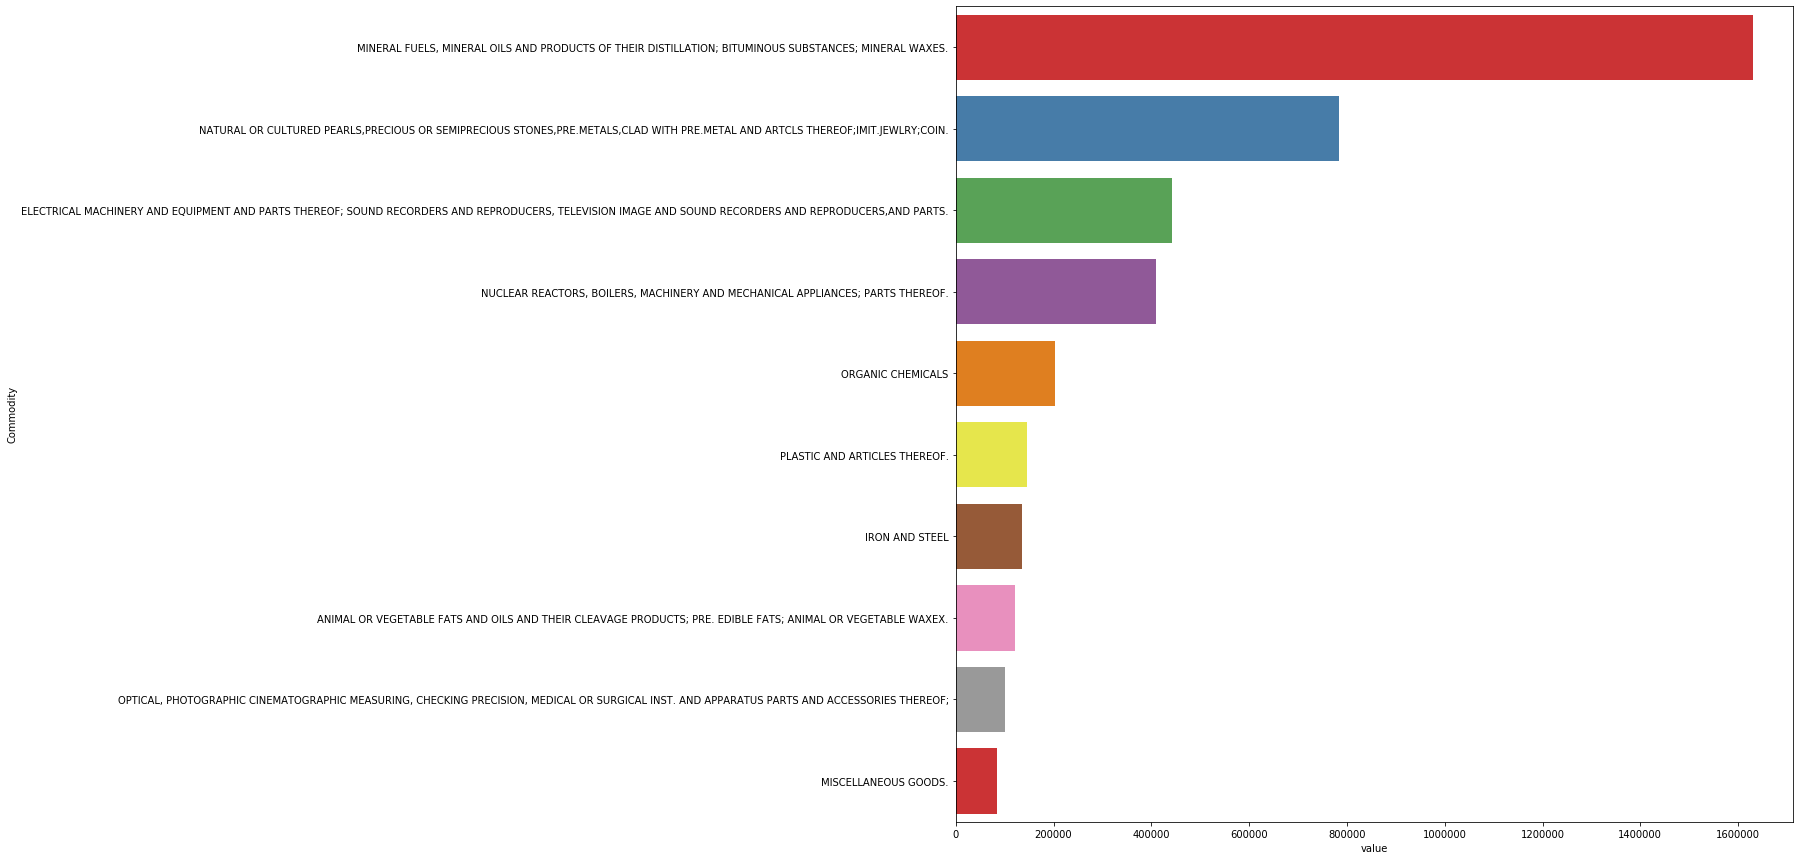

In [26]:
plt.figure(figsize=(15,15))
sns.barplot(import_Commodity.value,import_Commodity.index,palette = 'Set1')
plt.savefig("pic2.png")


## Highest Importing Commodities
 1. MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES 
    
2. NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;
   IMIT.JEWLRY;COIN.
3. ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,
    AND PARTS

4. NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.
    


## Top 10 Exporting Commodities


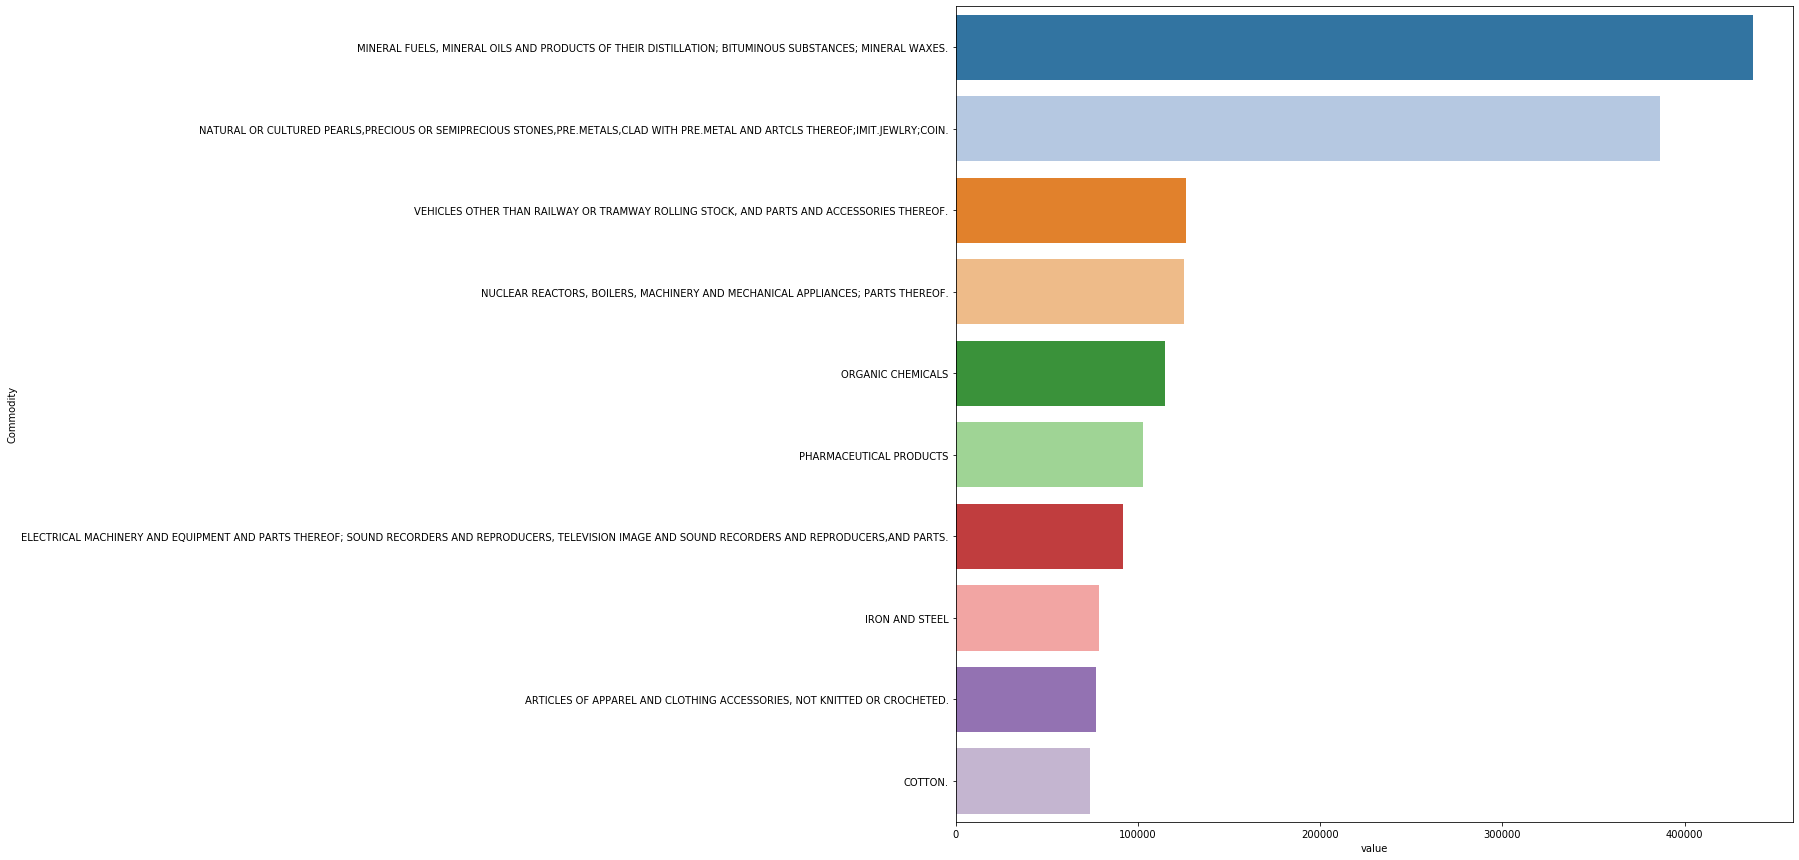

In [27]:
plt.figure(figsize=(15,15))
sns.barplot(export_Commodity.value,export_Commodity.index,palette='tab20')

## Highest Exporting  Commodities
1. MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.
2. NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLSc    THEREOF;IMIT.JEWLRY;COIN.
3. VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.
4. NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.

In [28]:
import_yearly=import_df.groupby('year').agg({'value':'sum'})
export_yearly=export_df.groupby('year').agg({'value':'sum'})

### Yearly Import

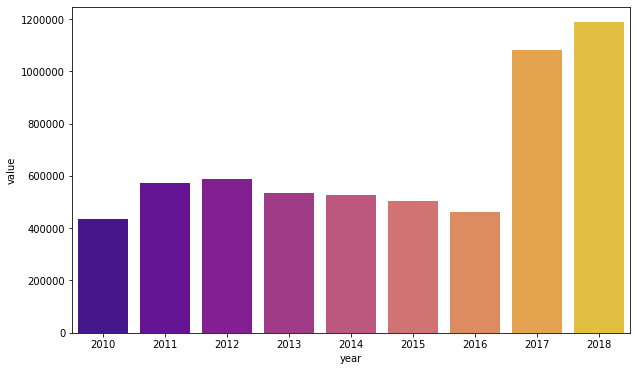

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(import_yearly.index,import_yearly.value,palette='plasma')
plt.savefig("pic3.png")

### Yearly Exporting

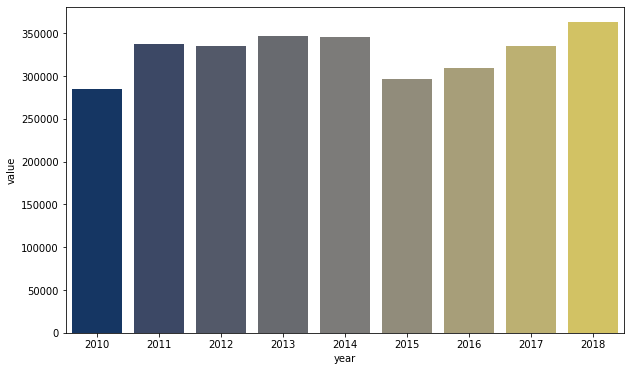

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(export_yearly.index,export_yearly.value,palette='cividis')
plt.savefig("pic4.png")

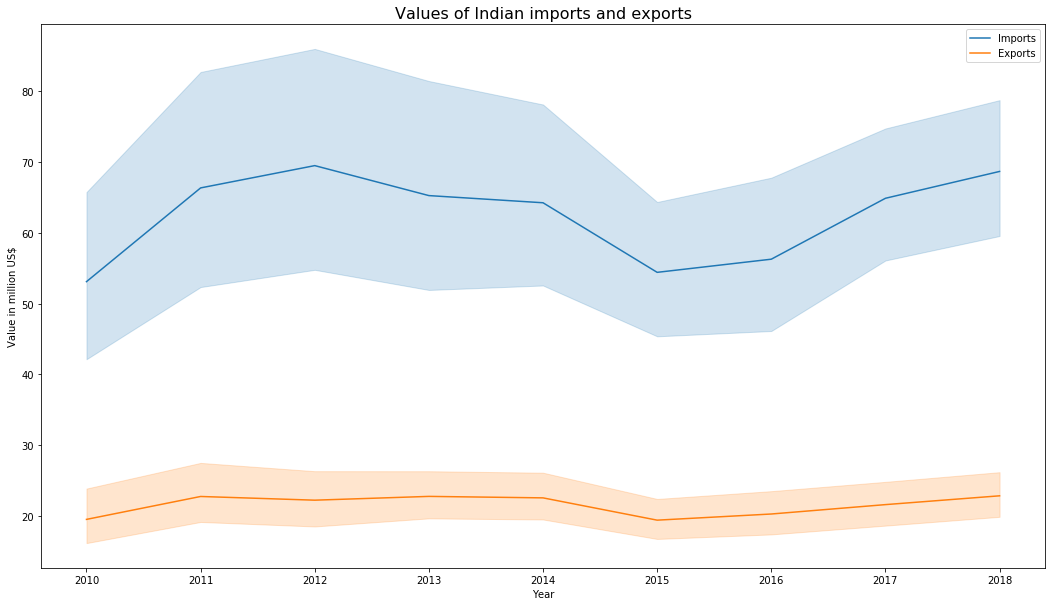

In [33]:
plt.figure(figsize= (18,10))
sns.lineplot(x='year',y='value', data=import_df, label='Imports')
sns.lineplot(x='year',y='value', data=export_df, label='Exports')
plt.title('Values of Indian imports and exports', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Value in million US$')
plt.show()

In [34]:
import_df=import_df[import_df.value>1000]
export_df=export_df[export_df.value>1000]

In [35]:
import_df2 = import_df.groupby(['country']).agg({'value': 'sum'}).sort_values(by='value')
export_df2 = export_df.groupby(['country']).agg({'value': 'sum'}).sort_values(by='value')

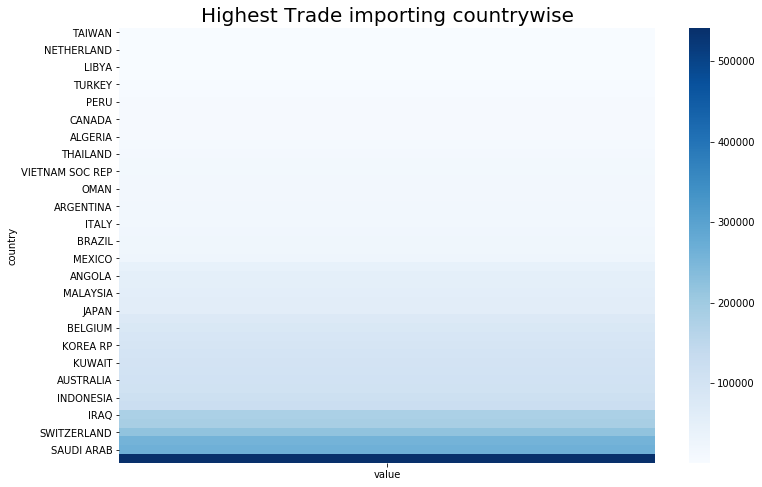

In [36]:
plt.figure(figsize=(12,8))
plt.title('Highest Trade importing countrywise', fontsize = 20)
sns.heatmap(import_df2,cmap='Blues')

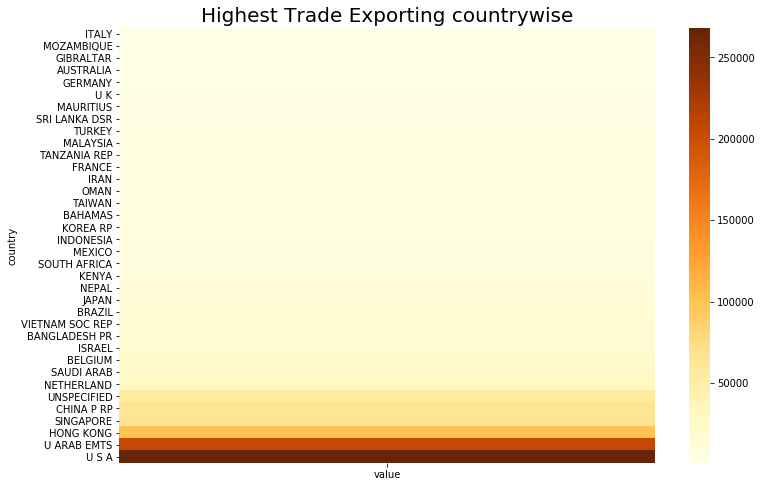

In [39]:
plt.figure(figsize=(12,8))
plt.title('Highest Trade Exporting countrywise', fontsize = 20)
sns.heatmap(export_df2,cmap='YlOrBr')
plt.savefig("pic5.png")

# Profit and Loss by Yaerly

In [41]:
df_im = import_df.groupby('year').agg({'value':'sum'})
df_ex=  export_df.groupby('year').agg({'value':'sum'})

In [43]:
df_im['deficit'] = df_ex-df_im

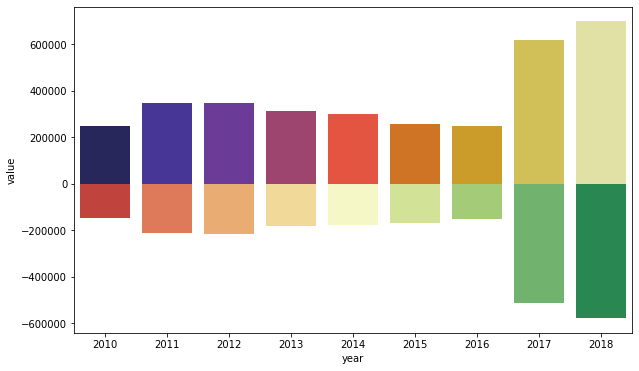

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(df_im.index,df_im.deficit, palette='RdYlGn')
sns.barplot(df_im.index,df_im.value,palette='CMRmap')
plt.savefig("pic6.png")